# iShares S&P 500 Top 20 ETF 日足

In [1]:
import sys
sys.path.append('..')

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '313A.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='1y')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-03-18 00:00:00+09:00,178.000000,178.000000,177.100006,178.000000,217180,0.0,0.0,0.0
2025-03-19 00:00:00+09:00,175.600006,176.000000,175.000000,176.000000,353430,0.0,0.0,0.0
2025-03-21 00:00:00+09:00,176.300003,177.800003,176.300003,177.699997,76030,0.0,0.0,0.0
2025-03-24 00:00:00+09:00,179.899994,180.399994,179.800003,180.399994,245110,0.0,0.0,0.0
2025-03-25 00:00:00+09:00,183.500000,184.000000,183.300003,183.500000,107210,0.0,0.0,0.0


## 日足チャートとパラボリック SAR

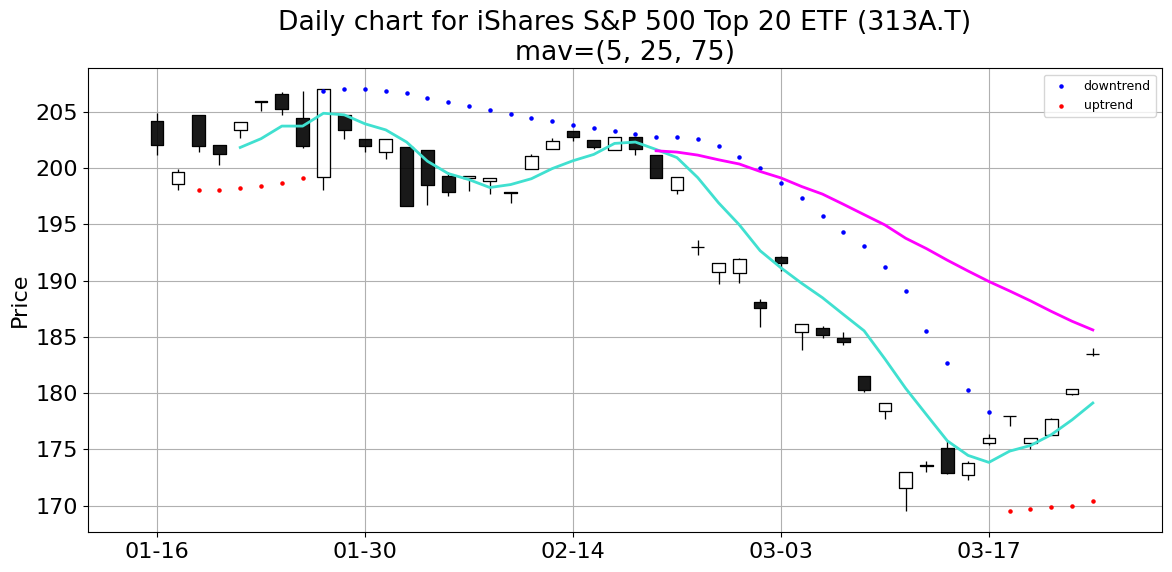

In [3]:
dict_psar = psar(df)

plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)


plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-03-24 00:00:00+09:00    180.399994
2025-03-25 00:00:00+09:00    183.500000
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-03-24 00:00:00+09:00         NaN
2025-03-25 00:00:00+09:00    3.100006
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-03-24 00:00:00+09:00    177.619998
2025-03-25 00:00:00+09:00    179.119998
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-03-24 00:00:00+09:00    186.388
2025-03-25 00:00:00+09:00    185.616
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-03-24 00:00:00+09:00   NaN
2025-03-25 00:00:00+09:00   NaN
Name: Close, dtype: float64